In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.stats.api as sms

### Production and Prices

In [31]:
dfs = []

# Loop through the years from 2015 to 2023
for i in range(2015, 2024):
    # Construct the file path for each year
    file_path = f'energy-charts_Public_net_electricity_generation_in_Germany_in_{i}.csv'
    
    # Read the CSV file for the current year and append to the list
    df = pd.read_csv(file_path, skiprows=[1]) 
    df['Hour'] = df['Date (GMT+1)'].str.split('T').str[1].str.split('+').str[0].str.split(':').str[0]
    df['Date'] = df['Date (GMT+1)'].str.split('T').str[0]
    # Convert 15-minute MW to hourly MW
    df_hourly = df.groupby(['Date', 'Hour']).sum()
    
    
    
    # Convert columns to numeric if they contain strings
    df_hourly[['Wind offshore','Wind onshore','Solar','Load']]
    # Divide the sum of power generation values by 4
    df_hourly[['Wind offshore','Wind onshore','Solar','Load']] = df_hourly[['Wind offshore','Wind onshore','Solar','Load']] / 4
    df_hourly.reset_index(inplace=True)
    
    
    df_hourly['Date'] = pd.to_datetime(df_hourly['Date'])

    # Convert 'Hour' column to string and pad single-digit hours with '0' to maintain a consistent format
    df_hourly['Hour'] = df_hourly['Hour'].astype(str).str.zfill(2)

    # Merge 'Date' and 'Hour' into a new column 'DateHour' and then drop 'Hour' column
    df_hourly['Date'] = df_hourly['Date'].dt.strftime('%Y-%m-%d') + ' ' + df_hourly['Hour'] + ':00:00'
    df_hourly['Date'] = pd.to_datetime(df_hourly['Date'])  # Convert to datetime format
    df_hourly = df_hourly.drop(columns=['Hour'])
    df_hourly.drop(columns=['Date (GMT+1)'], inplace=True)
    dfs.append(df_hourly)

# Concatenate all dataframes into a single dataframe
Power_production = pd.concat(dfs, ignore_index=True)
Renewable = Power_production[['Date','Wind offshore','Wind onshore','Solar','Load']] 

dfe = []

# Loop through the years from 2015 to 2023
for i in range(2015, 2024):
    # Construct the file path for each year
    file_path = f'energy-charts_Electricity_production_and_spot_prices_in_Germany_in_{i}.csv'
    
    # Read the CSV file for the current year and append to the list
    df = pd.read_csv(file_path, skiprows=[1])
    df['Hour'] = df['Date (GMT+1)'].str.split('T').str[1].str.split('+').str[0].str.split(':').str[0]
    df['Date'] = df['Date (GMT+1)'].str.split('T').str[0]
    df['Date'] = pd.to_datetime(df['Date'])

    # Convert 'Hour' column to string and pad single-digit hours with '0' to maintain a consistent format
    df['Hour'] = df['Hour'].astype(str).str.zfill(2)

    # Merge 'Date' and 'Hour' into a new column 'DateHour' and then drop 'Hour' column
    df['Date'] = df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Hour'] + ':00:00'
    df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime format
    df = df.drop(columns=['Hour'])
    df.drop(columns=['Date (GMT+1)'], inplace=True)
    dfe.append(df)

# Concatenate all dataframes into a single dataframe
Power_prices = pd.concat(dfe, ignore_index=True)
Power_prices = Power_prices[['Date','Day Ahead Auction']]
Power_DATA = pd.merge(Power_prices, Renewable, on='Date', how='inner')

In [39]:
Power_production

,Date,Nuclear,Hydro Run-of-River,Biomass,Fossil brown coal / lignite,Fossil hard coal,Fossil oil,Fossil coal-derived gas,Fossil gas,Geothermal,Hydro water reservoir,Hydro pumped storage,Others,Other renewables,Waste,Wind offshore,Wind onshore,Solar,Load
0,2015-01-01 00:00:00,42842.1,4592.8,15990.1,62749.2,12878.0,705.4,0.0,4905.1,41.3,41.8,3655.4,1022.7,491.1,1192.6,521.200,8849.675,0.0,44600.150
1,2015-01-01 01:00:00,44344.2,4508.9,15826.5,61287.7,9405.1,696.7,0.0,3482.3,41.6,243.1,1832.8,1173.6,450.1,1180.1,520.825,9046.300,0.0,43454.900
2,2015-01-01 02:00:00,44103.8,4476.4,15966.2,59270.4,8907.2,690.9,0.0,3238.7,41.6,81.3,1083.9,1262.4,332.9,1153.4,519.025,9196.425,0.0,41963.250
3,2015-01-01 03:00:00,44110.9,4463.0,16039.5,56299.6,9358.2,692.8,0.0,3283.4,41.9,26.5,678.5,1104.4,305.0,1214.3,522.575,9146.800,0.0,40617.800
4,2015-01-01 04:00:00,43848.8,4442.0,16023.4,56460.1,9845.5,697.1,0.0,3323.7,42.0,4.5,493.3,1065.9,304.3,1211.8,524.650,9203.950,0.0,39936.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78874,2023-12-31 19:00:00,0.0,6118.8,18999.7,13625.2,8451.6,1574.3,NaN,11250.4,82.0,443.6,11687.8,823.9,272.9,3083.1,6325.525,28941.800,0.0,49504.050
78875,2023-12-31 20:00:00,0.0,6134.7,19055.0,13474.6,7549.5,1575.2,NaN,10890.5,82.0,613.4,6001.5,823.7,272.8,3117.5,6303.975,29705.575,0.0,46387.300
78876,2023-12-31 21:00:00,0.0,6150.7,19177.0,13495.8,7743.2,1573.4,NaN,10702.4,82.0,1101.9,3636.5,823.8,272.8,3103.5,6359.900,29467.600,0.0,44212.950
78877,2023-12-31 22:00:00,0.0,6138.1,19195.0,13500.4,7610.5,1567.4,NaN,10576.4,82.0,699.0,3999.9,824.7,273.2,3101.7,6285.150,29597.000,0.0,43123.250


#### Finding capture rates

In [28]:
# Step 1: Extract the date from the datetime column
Power_DATA['Date'] = pd.to_datetime(Power_DATA['Date']).dt.date

# Step 2: Group by date and calculate the total revenue and production for each renewable energy source
grouped = Power_DATA.groupby('Date').agg(
    TotalRevenueWindOffshore=('Wind offshore', lambda x: (x * Power_DATA.loc[x.index, 'Day Ahead Auction']).sum()),
    TotalProductionWindOffshore=('Wind offshore', 'sum'),
    TotalRevenueWindOnshore=('Wind onshore', lambda x: (x * Power_DATA.loc[x.index, 'Day Ahead Auction']).sum()),
    TotalProductionWindOnshore=('Wind onshore', 'sum'),
    TotalRevenueSolar=('Solar', lambda x: (x * Power_DATA.loc[x.index, 'Day Ahead Auction']).sum()),
    TotalProductionSolar=('Solar', 'sum'),
    TotalRevenueBaseload=('Load', lambda x: (x * Power_DATA.loc[x.index, 'Day Ahead Auction']).sum()),
    BaseloadProduction=('Load', 'sum')
)

# Step 3: Calculate the average price (capture price) for each renewable energy source
grouped['Capture_Price_WindOffshore'] = grouped['TotalRevenueWindOffshore'] / grouped['TotalProductionWindOffshore']
grouped['Capture_Price_WindOnshore'] = grouped['TotalRevenueWindOnshore'] / grouped['TotalProductionWindOnshore']
grouped['Capture_Price_Solar'] = grouped['TotalRevenueSolar'] / grouped['TotalProductionSolar']
grouped['Baseload_Price'] = grouped['TotalRevenueBaseload'] / grouped['BaseloadProduction']

# Step 4: Calculate the capture factor compared to baseload production
grouped['Capture_Factor_Wind_Offshore'] = grouped['Capture_Price_WindOffshore'] / grouped['Baseload_Price']
grouped['Capture_Factor_Wind_Onshore'] = grouped['Capture_Price_WindOnshore'] / grouped['Baseload_Price']
grouped['Capture_Factor_Solar'] = grouped['Capture_Price_Solar'] / grouped['Baseload_Price']
grouped.reset_index(inplace=True)

# Step 5: Display the results
Capture_factors = grouped[['Date','Capture_Factor_Wind_Offshore', 'Capture_Factor_Wind_Onshore', 'Capture_Factor_Solar']]
Capture_prices = grouped[['Date','Capture_Price_WindOffshore', 'Capture_Price_WindOnshore', 'Capture_Price_Solar','Baseload_Price']]
Capture_factors['Date'] = pd.to_datetime(Capture_factors['Date'])

C:\Users\Bruger\AppData\Local\Temp\ipykernel_9692\32777309.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Capture_factors['Date'] = pd.to_datetime(Capture_factors['Date'])


### Volatility making it staionary 

In [27]:
# Convert Date to datetime format
Power_DATA['Date'] = pd.to_datetime(Power_DATA['Date'])

# Extract day, year, and month from the Date column
Power_DATA['Day'] = Power_DATA['Date'].dt.day
Power_DATA['Year'] = Power_DATA['Date'].dt.year
Power_DATA['Month'] = Power_DATA['Date'].dt.month

# Calculate the standard deviation of 'Day Ahead Auction' grouped by Year, Month, and Day
volatility = Power_DATA.groupby(['Year', 'Month', 'Day'])['Day Ahead Auction'].std()

# Weighted standard deviation
weighted_volatility = Power_DATA.groupby(['Year', 'Month', 'Day']).apply(
    lambda x: np.sqrt(np.average((x['Day Ahead Auction'] - x['Day Ahead Auction'].mean()) ** 2, weights=x['Load']))
)

# Make dataframe
volatility_reset = volatility.reset_index()
volatility_reset.columns = ['Year', 'Month', 'Day', 'Volatility']
volatility_reset['Date'] = pd.to_datetime(volatility_reset[['Year', 'Month', 'Day']])
volatility_reset = volatility_reset.drop(columns=['Year', 'Month', 'Day'])
volatility_reset


# Make dataframe
weighted_volatility_reset = weighted_volatility.reset_index()
weighted_volatility_reset.columns = ['Year', 'Month', 'Day', 'Weighted_volatility']
weighted_volatility_reset['Date'] = pd.to_datetime(weighted_volatility_reset[['Year', 'Month', 'Day']])
weighted_volatility_reset = weighted_volatility_reset.drop(columns=['Year', 'Month', 'Day'])
weighted_volatility_reset['Date'] = pd.to_datetime(weighted_volatility_reset['Date'])
weighted_volatility_reset['Weighted_volatility_adj'] = weighted_volatility_reset['Weighted_volatility'].pct_change().dropna()
weighted_volatility_reset.dropna(inplace=True)

### Merge

In [7]:
ANALYSE_DATA = pd.merge(Capture_factors, weighted_volatility_reset, on='Date', how='inner')
ANALYSE_DATA

,Date,Capture_Factor_Wind_Offshore,Capture_Factor_Wind_Onshore,Capture_Factor_Solar,Weighted_volatility,Weighted_volatility_adj
0,2015-01-02,1.000941,0.963322,1.127742,12.155596,-0.030222
1,2015-01-03,0.958118,0.938158,1.117275,12.292289,0.011245
2,2015-01-04,0.961230,0.949937,1.134130,12.345635,0.004340
3,2015-01-05,0.861667,0.861899,1.099329,12.056345,-0.023433
4,2015-01-06,1.002306,1.018463,0.933944,5.657960,-0.530707
...,...,...,...,...,...,...
3281,2023-12-27,0.928408,0.846328,1.204523,21.386895,-0.117531
3282,2023-12-28,0.996541,0.939164,0.909477,16.563178,-0.225545
3283,2023-12-29,1.101889,0.913333,0.151583,9.029815,-0.454826
3284,2023-12-30,0.849273,0.742267,0.734637,25.611030,1.836274


### Plots

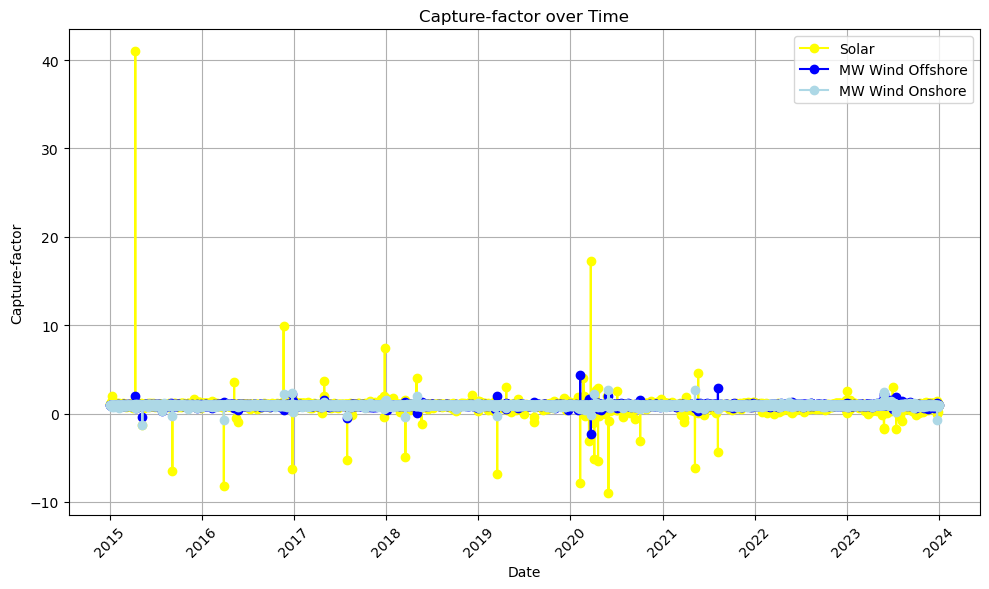

In [17]:
plt.figure(figsize=(10, 6))

plt.plot(ANALYSE_DATA['Date'], ANALYSE_DATA['Capture_Factor_Solar'], marker='o', color='yellow', linestyle='-', label='Solar')
plt.plot(ANALYSE_DATA['Date'], ANALYSE_DATA['Capture_Factor_Wind_Offshore'], marker='o', color='blue', linestyle='-', label='MW Wind Offshore')
plt.plot(ANALYSE_DATA['Date'], ANALYSE_DATA['Capture_Factor_Wind_Onshore'] , marker='o', color='lightblue', linestyle='-', label='MW Wind Onshore')

plt.title('Capture-factor over Time')
plt.xlabel('Date')
plt.ylabel('Capture-factor')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [38]:
# Filter the DataFrame to select rows where Capture_Factor_Solar is above value
filtered_dates = ANALYSE_DATA[ANALYSE_DATA['Capture_Factor_Solar'] > 2]['Date']
print(filtered_dates)
Power_DATA['Date'] = pd.to_datetime(Power_DATA['Date'])
filtered_rows = Power_DATA[Power_DATA['Date'].dt.strftime('%Y-%m-%d %H:%M:%S').str.startswith('2015-04-12')]
filtered_rows

9      2015-01-11
100    2015-04-12
492    2016-05-08
688    2016-11-20
849    2017-04-30
850    2017-05-01
1089   2017-12-26
1215   2018-05-01
1437   2018-12-09
1571   2019-04-22
1877   2020-02-22
1906   2020-03-22
1928   2020-04-13
1936   2020-04-21
1969   2020-05-24
2011   2020-07-05
2332   2021-05-22
2920   2022-12-31
3103   2023-07-02
Name: Date, dtype: datetime64[ns]


,Date,Day Ahead Auction,Wind offshore,Wind onshore,Solar,Load
2423,2015-04-12 00:00:00,-14.47,1165.050,15628.850,0.000,42708.400
2424,2015-04-12 01:00:00,-16.78,1180.875,14406.975,0.000,40410.825
2425,2015-04-12 02:00:00,-12.20,1174.750,12631.175,0.000,38988.200
2426,2015-04-12 03:00:00,0.10,1145.825,10882.500,0.000,38861.450
2427,2015-04-12 04:00:00,11.37,1116.200,9179.850,0.000,39352.825
2428,2015-04-12 05:00:00,14.30,1100.350,8172.425,0.000,39554.400
2429,2015-04-12 06:00:00,12.99,1095.000,8056.575,88.250,39208.750
2430,2015-04-12 07:00:00,14.27,1105.400,7826.350,1632.350,41127.625
2431,2015-04-12 08:00:00,14.87,1083.800,6928.900,4915.275,44415.875
2432,2015-04-12 09:00:00,14.25,1076.975,6396.650,9850.425,47506.175


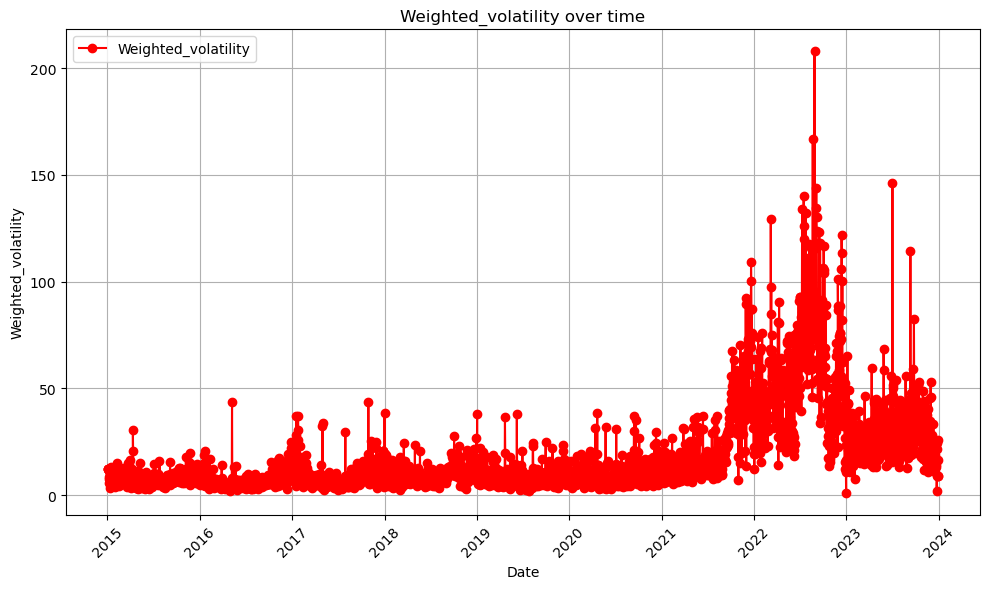

In [16]:
plt.figure(figsize=(10, 6))

plt.plot(ANALYSE_DATA['Date'], ANALYSE_DATA['Weighted_volatility'], marker='o', color='red', linestyle='-', label='Weighted_volatility')

plt.title('Weighted_volatility over time')
plt.xlabel('Date')
plt.ylabel('Weighted_volatility')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

### Empirical analysis

In [8]:
# Define the independent variables including the constant
X = sm.add_constant(ANALYSE_DATA['Capture_Factor_Wind_Offshore'])

# Define the dependent variable
y = ANALYSE_DATA['Weighted_volatility_adj']

# Fit the regression model
model_OLS = sm.OLS(y, X).fit()

# Print the summary of the model
print(model_OLS.summary())

# Get the number of observations and parameters
n = len(y)
k = model_OLS.df_model  # Number of parameters including intercept

# Compute the residual sum of squares
rss = np.sum(model_OLS.resid**2)

# Compute AIC
aic = n * np.log(rss / n) + 2 * k

# Compute BIC
bic = n * np.log(rss / n) + k * np.log(n)

print("AIC:", aic)
print("BIC:", bic)

                               OLS Regression Results                              
Dep. Variable:     Weighted_volatility_adj   R-squared:                       0.005
Model:                                 OLS   Adj. R-squared:                  0.004
Method:                      Least Squares   F-statistic:                     15.56
Date:                     Tue, 20 Feb 2024   Prob (F-statistic):           8.15e-05
Time:                             12:53:40   Log-Likelihood:                -3682.9
No. Observations:                     3286   AIC:                             7370.
Df Residuals:                         3284   BIC:                             7382.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

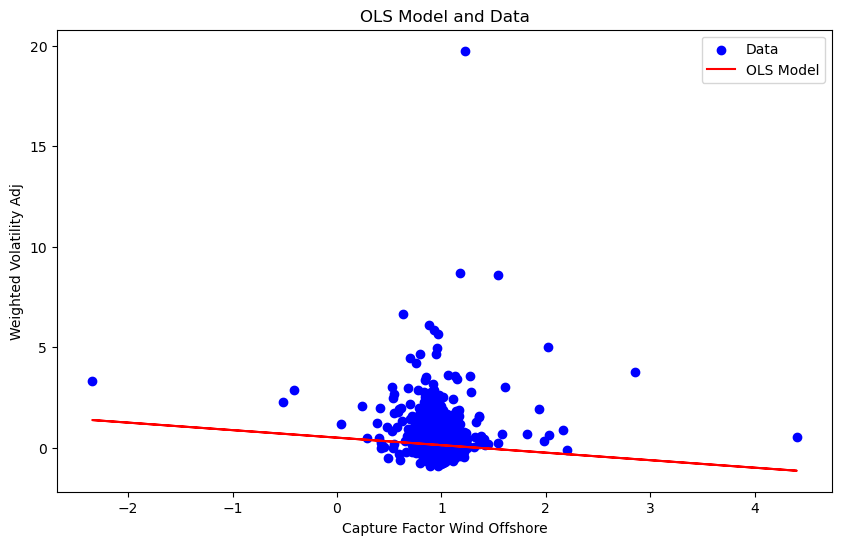

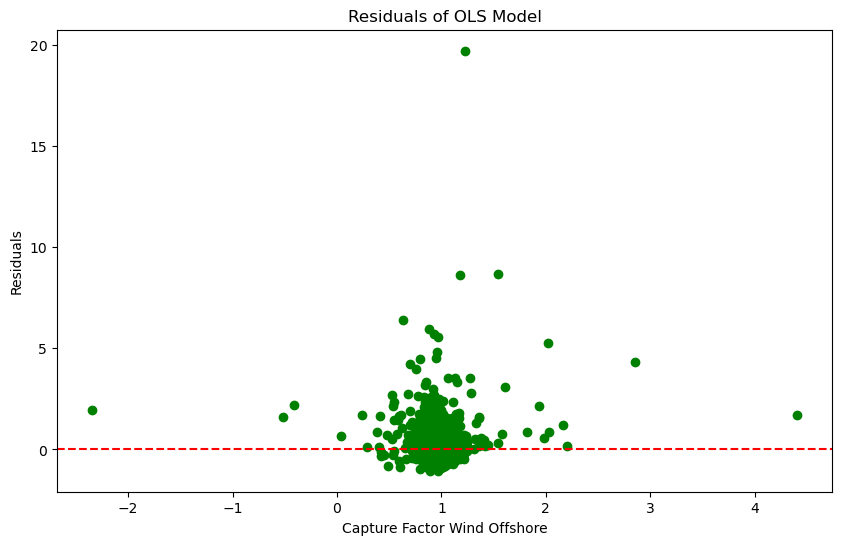

In [11]:
# Plot the model
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 1], y, color='blue', label='Data')
plt.plot(X.iloc[:, 1], model_OLS.predict(), color='red', label='OLS Model')
plt.xlabel('Capture Factor Wind Offshore')
plt.ylabel('Weighted Volatility Adj')
plt.title('OLS Model and Data')
plt.legend()
plt.show()

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 1], model_OLS.resid, color='green')
plt.xlabel('Capture Factor Wind Offshore')
plt.ylabel('Residuals')
plt.title('Residuals of OLS Model')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()